## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata , study_results,how='outer',on='Mouse ID')

# Display the data table for preview
combined_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(combined_data_df['Mouse ID'].nunique())

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df[combined_data_df.duplicated(subset=['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_mice_duplicate_df = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_mice = combined_data_mice_duplicate_df['Mouse ID'].unique()
duplicate_mice

# Display Result
combined_data_mice_duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe_mice =combined_data_df[(combined_data_df['Mouse ID']!= 'g989')]

# Display Result
clean_dataframe_mice.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe_mice.nunique()


Mouse ID                248
Drug Regimen             10
Sex                       2
Age_months               24
Weight (g)               16
Timepoint                10
Tumour Volume (mm3)    1633
Metastatic Sites          5
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regiment
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_avg = clean_dataframe_mice.groupby('Drug Regimen')['Tumour Volume (mm3)'].mean()
regimen_median = clean_dataframe_mice.groupby('Drug Regimen')['Tumour Volume (mm3)'].median()
regimen_var = clean_dataframe_mice.groupby('Drug Regimen')['Tumour Volume (mm3)'].var()
regimen_std = clean_dataframe_mice.groupby('Drug Regimen')['Tumour Volume (mm3)'].std()
regimen_sem = clean_dataframe_mice.groupby('Drug Regimen')['Tumour Volume (mm3)'].sem()
regimen_summary_statistics_df = pd.DataFrame({'Average Tumor Volume':regimen_avg,
                                             'Tumor Volume Median':regimen_median,
                                             'Tumor Volume Variance':regimen_var,
                                             'Tumor Volume Standard Deviation':regimen_std,
                                             'Tumor Volume SEM':regimen_sem})
# Display Result
regimen_summary_statistics_df


,Average Tumor Volume,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
single = ['mean','median','var','std','sem']

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_single_df = pd.DataFrame(clean_dataframe_mice.groupby('Drug Regimen').agg({'Tumour Volume (mm3)':single}))

# Display Result
regimen_summary_single_df


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

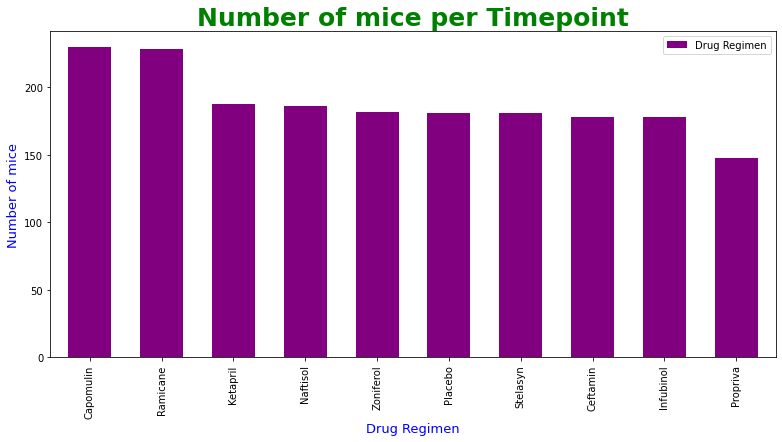

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

number_of_mice = clean_dataframe_mice['Drug Regimen'].value_counts()
number_of_mice.plot.bar(figsize=(13,6),color = 'purple',width = 0.6)
plt.xlabel('Drug Regimen',fontsize=13, color= 'blue' )
plt.ylabel('Number of mice', fontsize=13, color='blue')
plt.title('Number of mice per Timepoint', fontsize=25, fontweight = 'bold', color= 'green' )
plt.legend()
plt.savefig("Images/Barplotpandas.png")
plt.show()


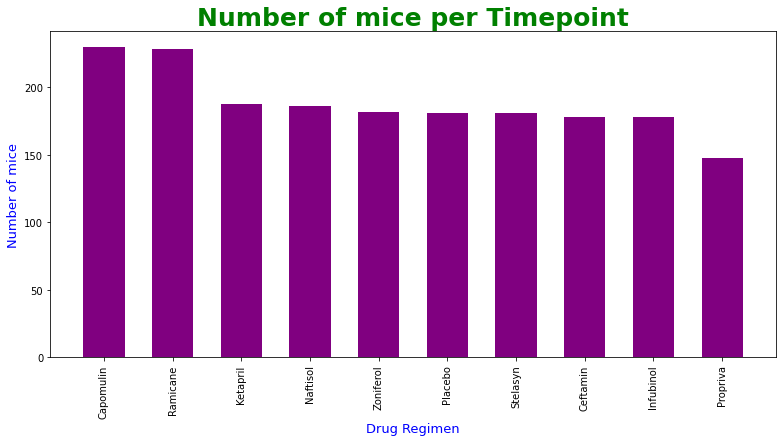

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize = (13,6))
plt.bar(number_of_mice.index.values,number_of_mice.values,color = 'purple',width = 0.6)
plt.xlabel('Drug Regimen',fontsize=13, color= 'blue')
plt.ylabel('Number of mice',fontsize=13, color= 'blue')
plt.title('Number of mice per Timepoint', fontsize=25, color= 'green', fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("Images/Barplotpyplot.png")
plt.show()


# Majority of the data appears consistent with capomulin ad ramicane having a higher sample size and propriva receiving the least amount tested compared to the overall test.  

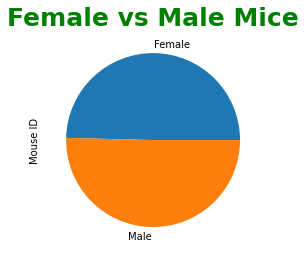

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_dataframe_mice.groupby(['Sex'])['Mouse ID'].nunique()

gender_demo = clean_dataframe_mice.groupby(['Sex'])['Mouse ID'].nunique()
gender_demo_df = pd.DataFrame(gender_demo)
plot = gender_demo_df.plot.pie(y="Mouse ID", legend= False)
plot.set_title("Female vs Male Mice", fontsize=25, fontweight = 'heavy', color='green')
plt.savefig("Images/Piechartpandas.png")
plt.show()


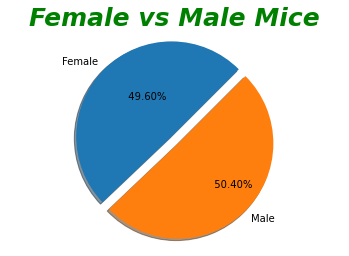

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

distribution = clean_dataframe_mice.groupby(['Sex'])['Mouse ID'].nunique()
gender_demographic = list(distribution.index)
explode = (0,0.1)
plt.pie(distribution,labels=gender_demographic,explode=explode,autopct='%15.2f%%',shadow=True,startangle=45)
plt.axis("equal")
plt.title("Female vs Male Mice",fontsize=25, fontweight = 'bold', style= 'italic', color='green')
plt.savefig("Images/Piechartplyplot.png")
plt.show()


# the mice population sample size has an close split which will reduce potential skewer or variable factor in the final result. 

## Quartiles, Outliers and Boxplots

In [13]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

regimen_drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regimen_drug_list_df= pd.DataFrame({"Drug Regimen":regimen_drug_list})

# regimen_drug_list_df

final_tumorvolume = clean_dataframe_mice.groupby(['Mouse ID'])['Timepoint'].max()
final_tumorvolume = pd.DataFrame(final_tumorvolume)

# Start by getting the last (greatest) timepoint for each mouse

final_tumorvolume_df = final_tumorvolume.merge(clean_dataframe_mice, how='left', on=['Mouse ID', 'Timepoint']) 
final_tumorvolume_df

regimen_drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regimen_drug_list_df= pd.DataFrame({"Drug Regimen":regimen_drug_list})

upperbound =[]
lowerbound=[]
iqrs = []

for drugs in regimen_drug_list:
    selected_drug = final_tumorvolume_df.loc[final_tumorvolume_df['Drug Regimen']==drugs,'Tumour Volume (mm3)']
    
    quartiles = selected_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    
    upperbound.append(upper_bound)
    lowerbound.append(lower_bound)
    iqrs.append(iqr)

regimen_drug_list_df['Upper Bond']= upperbound
regimen_drug_list_df['Lower Bond']= lowerbound
regimen_drug_list_df['IQR']= iqrs

print(regimen_drug_list_df)


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

final_count= regimen_drug_list_df.merge(final_tumorvolume_df, how='left', on=['Drug Regimen'])

first = final_count.loc[final_count['Drug Regimen']=='Capomulin']
Capomulin_outliers = first[(first['Tumour Volume (mm3)'] < 20.7) |(first['Tumour Volume (mm3)'] > 51.8)]
second = final_count.loc[final_count['Drug Regimen']=='Ramicane']
Ramicane_outliers = first[(first['Tumour Volume (mm3)'] < 17.9) |(first['Tumour Volume (mm3)'] > 54.3)]
third = final_count.loc[final_count['Drug Regimen']=='Infubinol']
Infubinole_outliers = first[(first['Tumour Volume (mm3)'] < 36.8) |(first['Tumour Volume (mm3)'] > 82.7)]
fourth = final_count.loc[final_count['Drug Regimen']=='Ceftamin']
Ceftamin_outliers = first[(first['Tumour Volume (mm3)'] < 25.3) |(first['Tumour Volume (mm3)'] > 87.6)]

# Merging with the original dataset to get the final tumor volume

print("\n------------------------------")
print("Capomulin_outliers", len(Capomulin_outliers))
print("Ramicane_outliers", len(Ramicane_outliers))
print("Infubinole_outliers", len(Infubinole_outliers))    


print("Ceftamin_outliers", len(Ceftamin_outliers))


  Drug Regimen  Upper Bond  Lower Bond        IQR
0    Capomulin   51.832015   20.704562   7.781863
1     Ramicane   54.306811   17.912664   9.098537
2    Infubinol   82.741446   36.832905  11.477135
3     Ceftamin   87.666458   25.355450  15.577752

------------------------------
Capomulin_outliers 0
Ramicane_outliers 0
Infubinole_outliers 10
Ceftamin_outliers 1


# Top performing drug based in order 0 to 3 based on effectiveness of reducing tumor size 

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumour vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumour volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
green_diamond = dict(markerfacecolor='g', marker='D')
    
final_count[final_count['Drug Regimen'] == 'Ramicane']['Tumour Volume (mm3)']

data_infubinol = final_count[final_count['Drug Regimen'] == 'Infubinol']['Tumour Volume (mm3)']
data_capomulin = final_count[final_count['Drug Regimen'] == 'Capomulin']['Tumour Volume (mm3)']
data_ramicane = final_count[final_count['Drug Regimen'] == 'Ramicane']['Tumour Volume (mm3)']
data_ceftamin = final_count[final_count['Drug Regimen'] == 'Ceftamin']['Tumour Volume (mm3)']


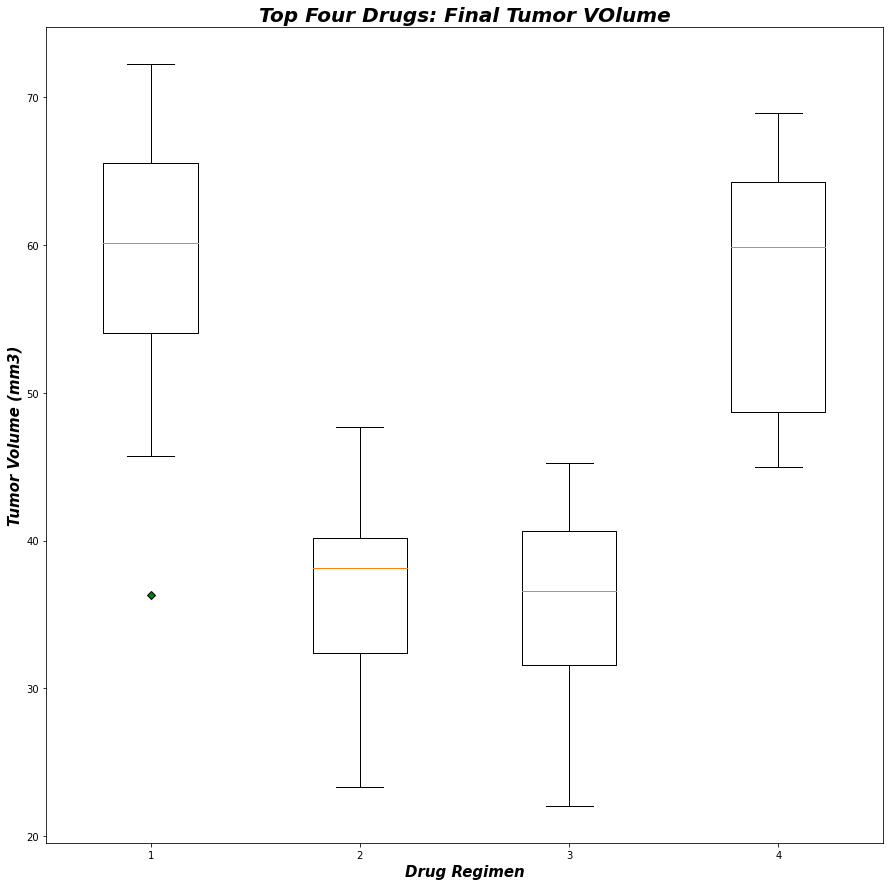

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

data = [data_infubinol,data_capomulin,data_ramicane,data_ceftamin]
labels = ['infubinol','capomulin','ramicane','ceftamin']
fig1, ax1 = plt.subplots(figsize = (15,15))
ax1.set_title('Top Four Drugs: Final Tumor VOlume',fontsize=20, fontweight = 'heavy', style= 'italic' )
plt.xlabel('Drug Regimen',fontsize=15, fontweight = 'heavy', style= 'italic')
plt.ylabel('Tumor Volume (mm3)',fontsize=15, fontweight = 'heavy', style= 'italic')
ax1.boxplot(data, flierprops=green_diamond) 
plt.savefig("Images/Boxplot.png")
plt.show()


# Box plot diagram indicates infubinol has the most outliers compared to ceftamin, with ramicane and capomulin no outliers produced. 

## Line and Scatter Plots

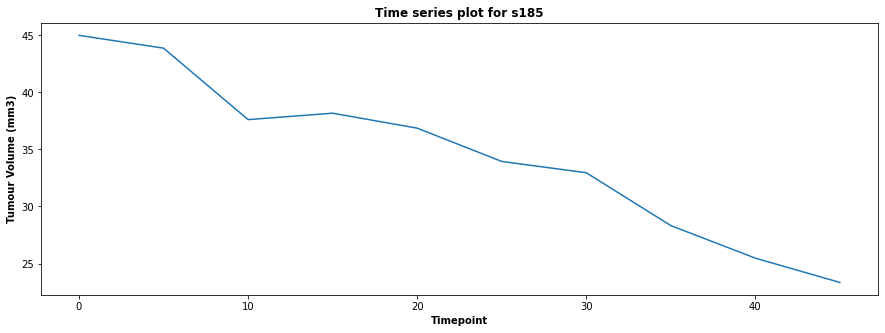

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

capo = clean_dataframe_mice[clean_dataframe_mice['Drug Regimen'] == 'Capomulin']
mouse_s185 = capo[capo['Mouse ID'] == 's185'][['Timepoint','Tumour Volume (mm3)']]

mouse_s185

plt.figure(figsize = (15,5))
plt.plot(mouse_s185['Timepoint'],mouse_s185['Tumour Volume (mm3)'])
plt.xlabel('Timepoint',fontweight='bold')
plt.ylabel('Tumour Volume (mm3)',fontweight='bold')
plt.title('Time series plot for s185',fontsize=12,fontweight='bold',style='normal')
plt.savefig("Images/Line.png")
plt.show()


# The drug appears to work with graph indicating as time progresses the tumor volume decreases in size tested against Mice s185

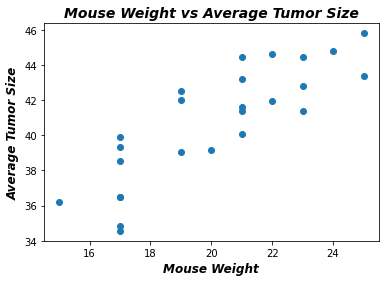

In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

mouse_s185

averages = capo.groupby('Mouse ID').mean()['Tumour Volume (mm3)']
merged = pd.merge(left = capo,right = averages,how = 'left',on = 'Mouse ID')
values = merged.groupby(['Mouse ID','Weight (g)'])['Tumour Volume (mm3)_y'].max()
values = values.reset_index()

values.head(10)

Capo_avg_tumor = clean_dataframe_mice.groupby('Mouse ID')['Tumour Volume (mm3)'].mean()
Capo_avg_tumor = Capo_avg_tumor .reset_index()
plt.scatter(values['Weight (g)'],values['Tumour Volume (mm3)_y'])
plt.xlabel('Mouse Weight',fontsize=12,fontweight='bold',style='oblique' )
plt.ylabel('Average Tumor Size',fontsize=12,fontweight='bold',style='oblique')
plt.title('Mouse Weight vs Average Tumor Size',fontsize=14,fontweight='bold',style='oblique')
plt.savefig("Images/ScatterPlot.png")
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

slope,intercept,rvalue,pvalue,stderr =st.linregress(values['Weight (g)'],values['Tumour Volume (mm3)_y'])
x = values['Weight (g)']
y = values['Tumour Volume (mm3)_y']

print("Correlation coefficient is %f"%rvalue)


Correlation coefficient is 0.841936


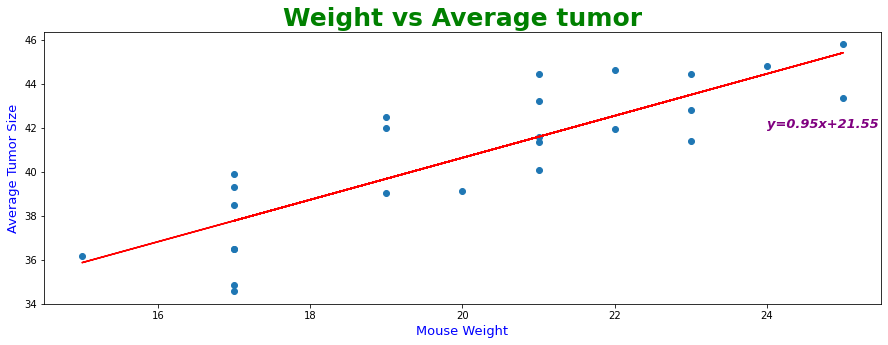

In [19]:
# for mouse weight and average tumour volume for the Capomulin regimen

regress_value = slope*x + intercept #for i in range(0,30)

plt.figure(figsize =(15,5))
plt.plot(x,regress_value,"r-")
plt.scatter(values['Weight (g)'],values['Tumour Volume (mm3)_y'])
line_slope = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.annotate(line_slope,(24,42), fontsize=13, color='purple', fontweight='heavy', style='italic')
plt.xlabel('Mouse Weight', fontsize=13, color= 'blue')
plt.ylabel('Average Tumor Size', fontsize=13, color= 'blue')
plt.title('Weight vs Average tumor', fontsize=25, color='green', fontweight='bold')
plt.savefig("Images/ScatterplotRegression.png")
plt.show()


# The trend line indicates there is a positive correlation between the mouse weight and the average tumour size
